In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [8]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [9]:
df.groupby('Occupation').mean()['Purchase'].sort_values()

Occupation
9     8714.335934
19    8754.249162
20    8881.099514
1     9017.703095
2     9025.938982
10    9052.836410
0     9186.946726
18    9233.671418
3     9238.077277
4     9279.026742
11    9299.467190
6     9336.378620
5     9388.848978
13    9424.449391
16    9457.133118
7     9502.175276
14    9568.536426
8     9576.508530
15    9866.239925
12    9883.052460
17    9906.378997
Name: Purchase, dtype: float64

In [10]:
df['Product_ID'].nunique()

3623

In [11]:
data = pd.DataFrame({'ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]} , index = ['Male', 'Female'])

In [12]:
data

,ratio
Male,405380
Female,132197


<AxesSubplot:xlabel='Gender'>

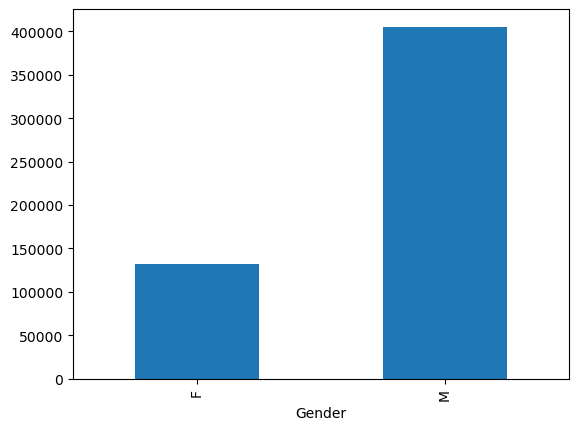

In [13]:
df.groupby('Gender').size().plot(kind = 'bar')

In [14]:
df.groupby('Gender')['Purchase']

In [15]:
lst = []
for i in df['Age'].unique():
    lst.append([i , df[df['Age'] == i]['Product_ID'].nunique()])
data = pd.DataFrame(lst, columns = ['Age', 'Products'])

<AxesSubplot:>

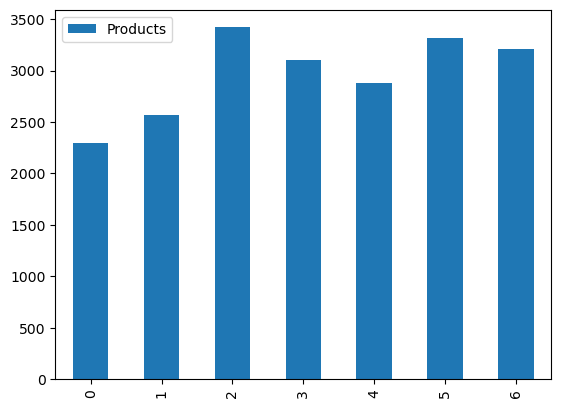

In [16]:
data.plot(kind= 'bar')

<AxesSubplot:ylabel='Purchase'>

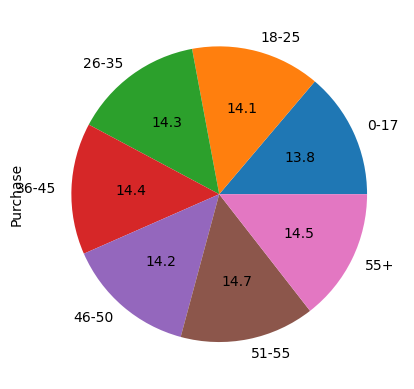

In [17]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

In [18]:
df['Product_ID']

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
537572    P00193542
537573    P00111142
537574    P00345942
537575    P00285842
537576    P00118242
Name: Product_ID, Length: 537577, dtype: object

<AxesSubplot:xlabel='Age', ylabel='count'>

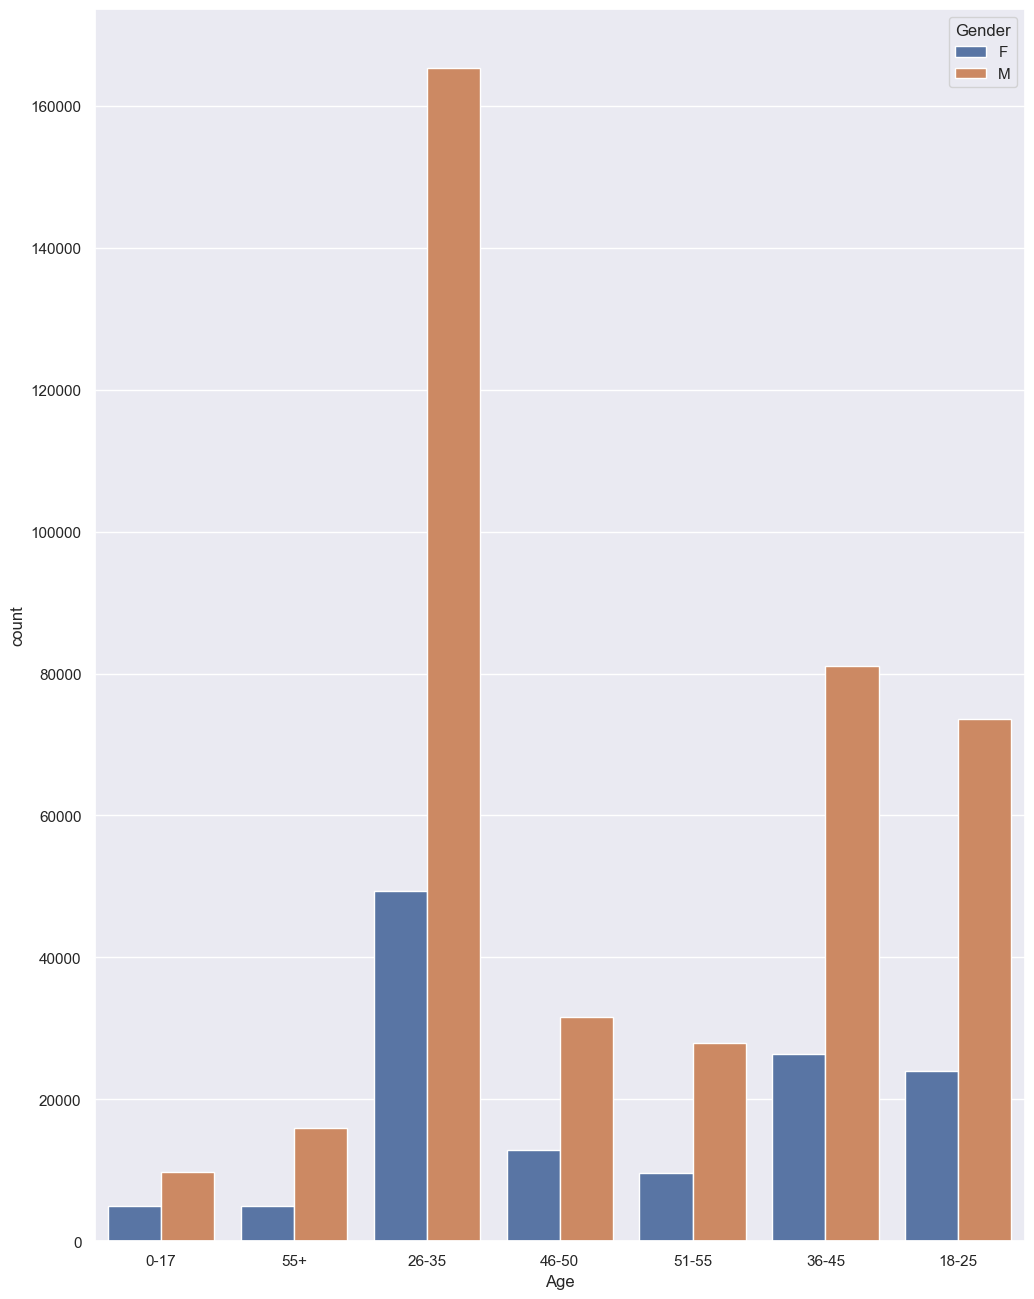

In [19]:
sns.set(rc = {'figure.figsize' : (12,16)})
sns.countplot(x = 'Age', hue = 'Gender', data = df)

<AxesSubplot:ylabel='None'>

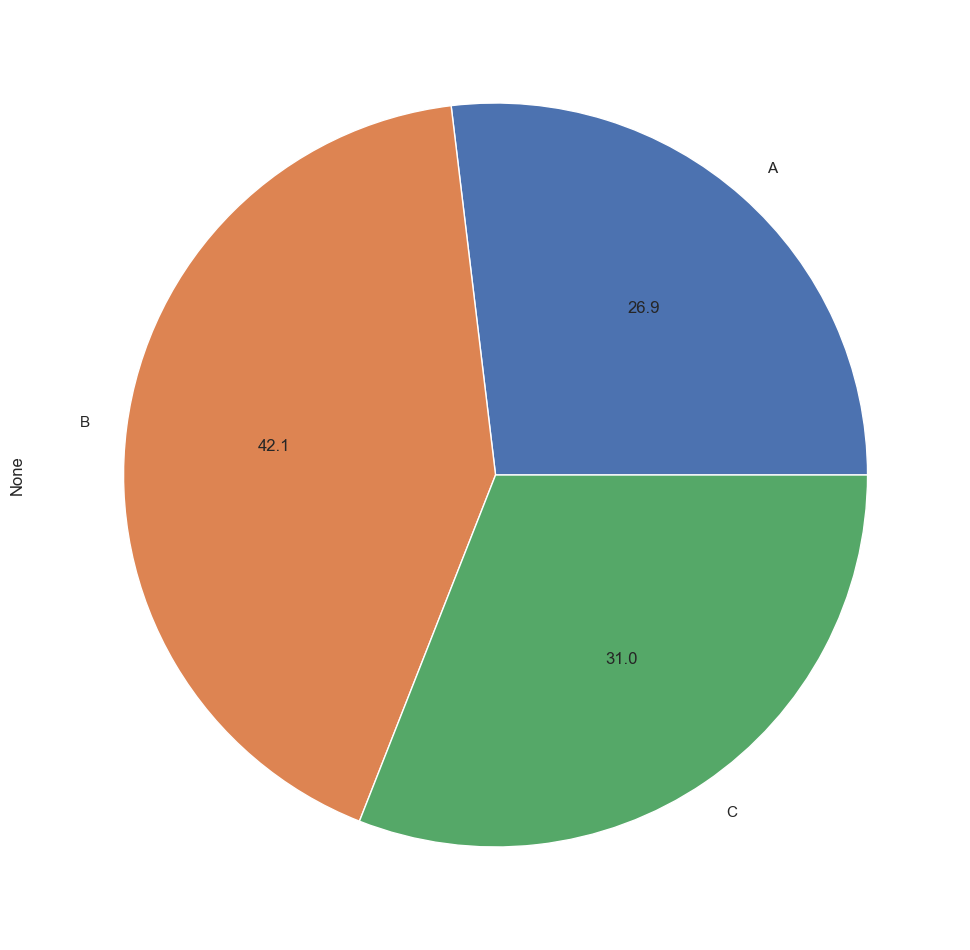

In [20]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

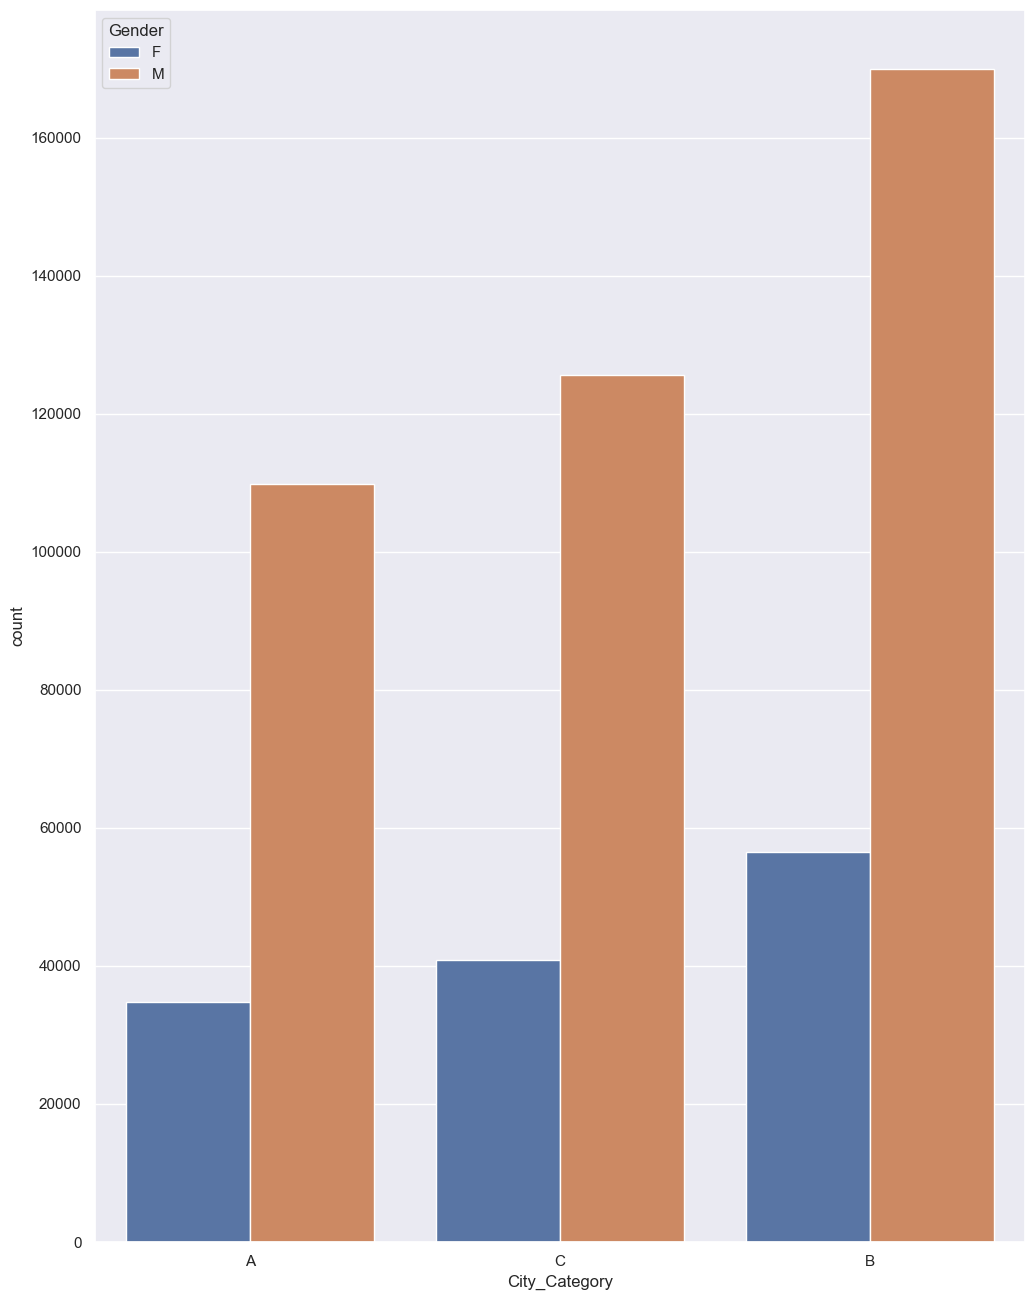

In [21]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

<AxesSubplot:ylabel='Purchase'>

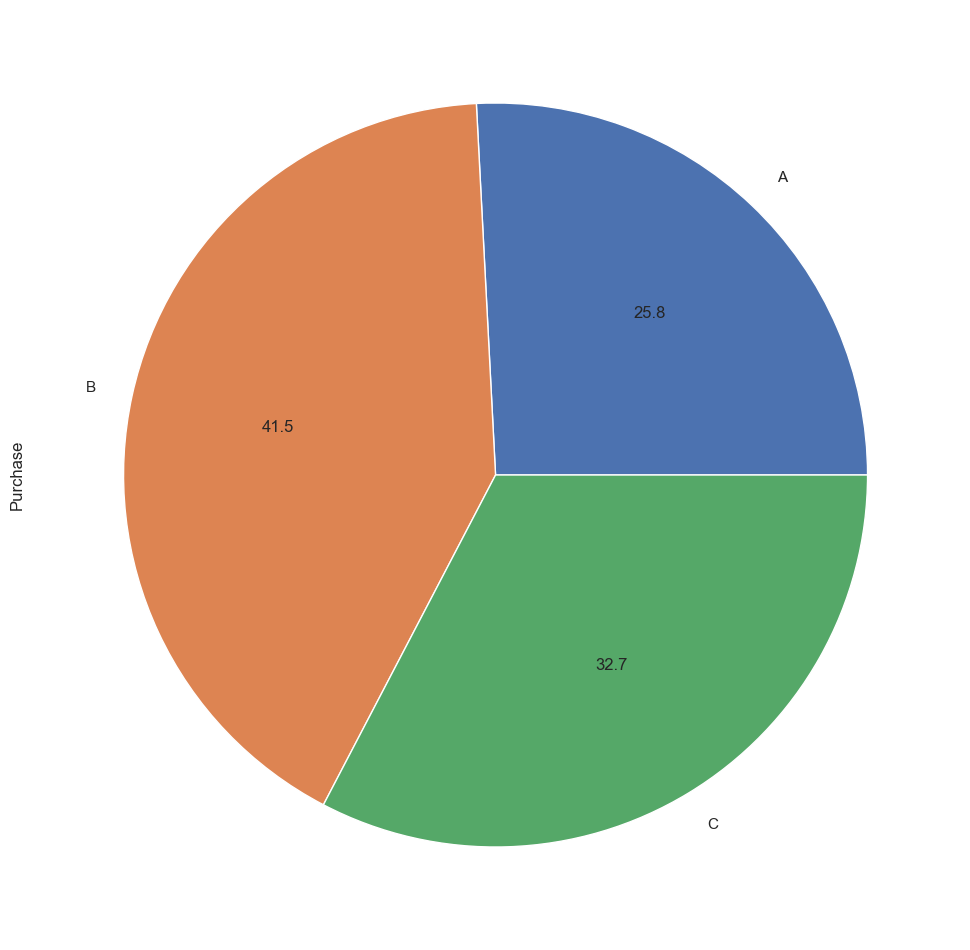

In [22]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

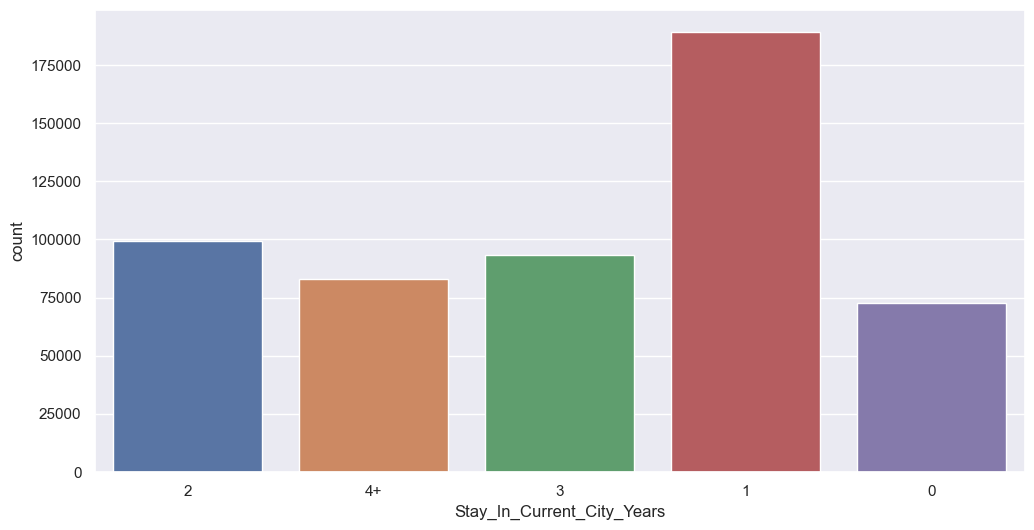

In [24]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = df['Stay_In_Current_City_Years'])

<AxesSubplot:ylabel='None'>

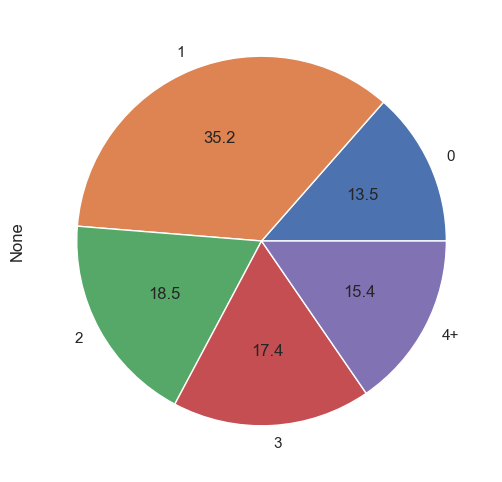

In [25]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%.1f")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

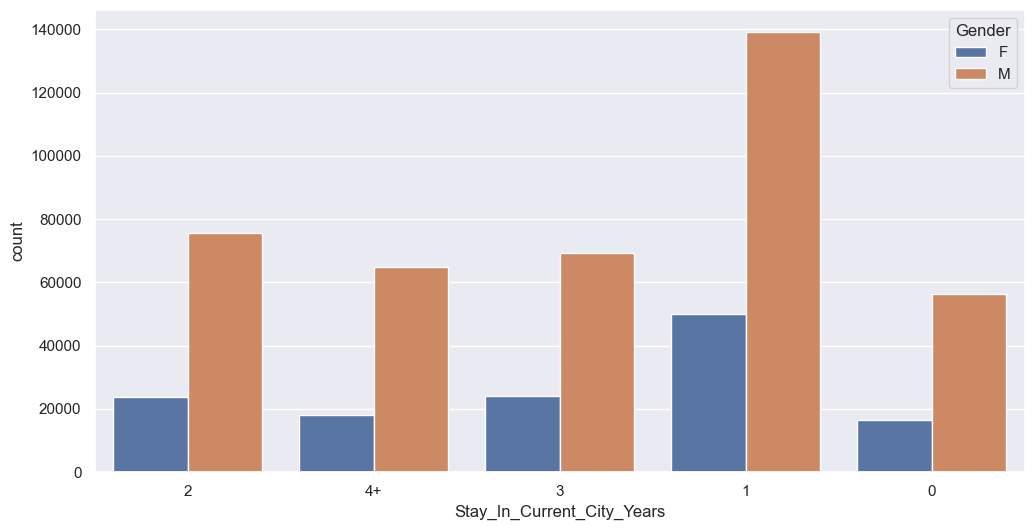

In [26]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

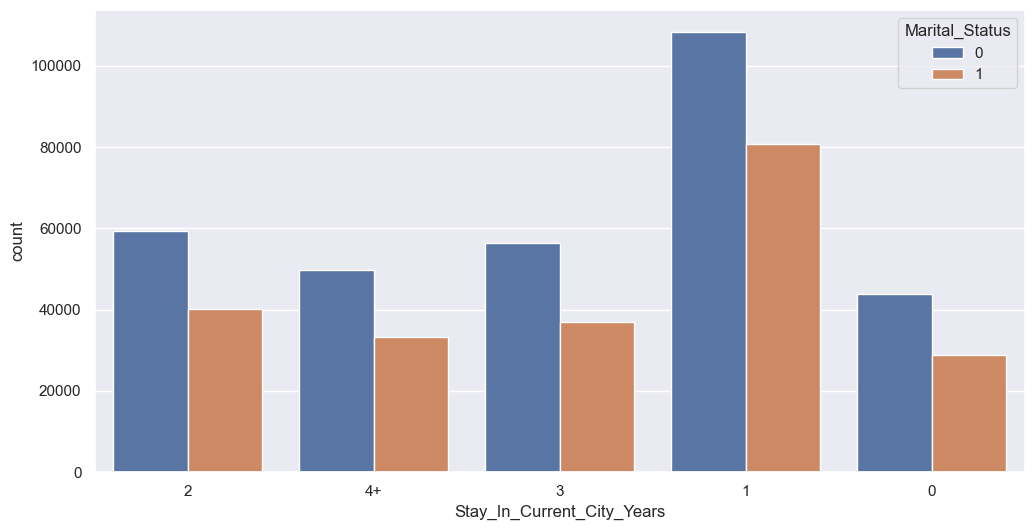

In [27]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

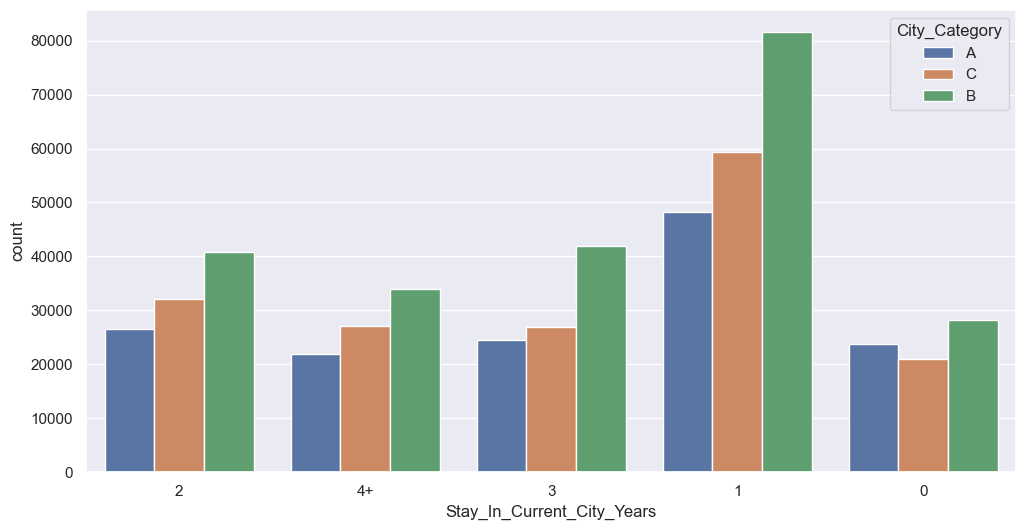

In [28]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

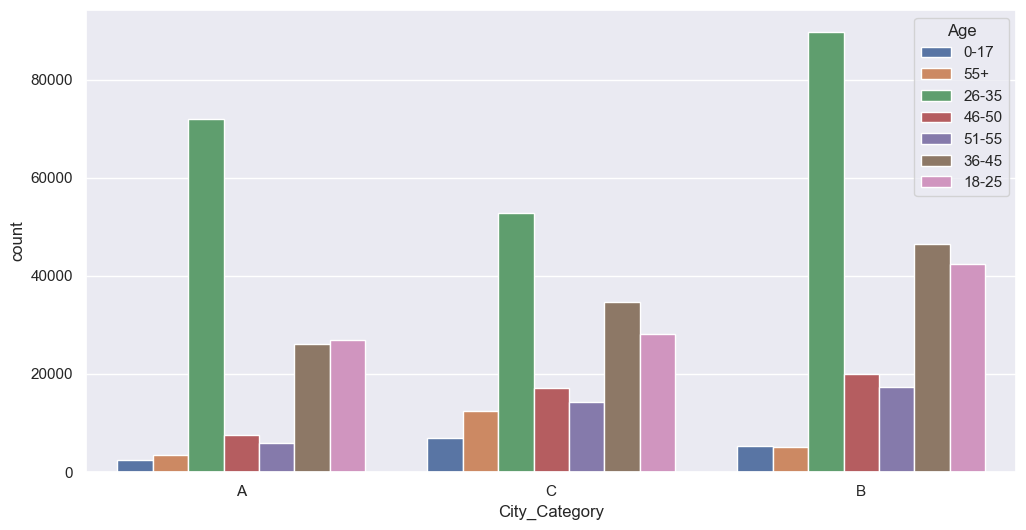

In [29]:
sns.countplot(x = 'City_Category', hue = 'Age',data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

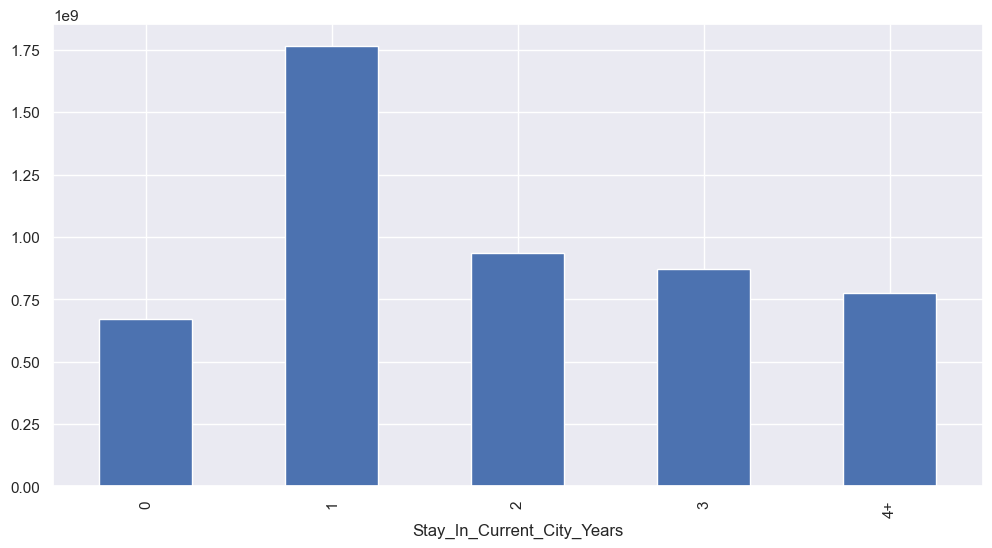

In [30]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

<AxesSubplot:xlabel='Stay_In_Current_City_Years'>

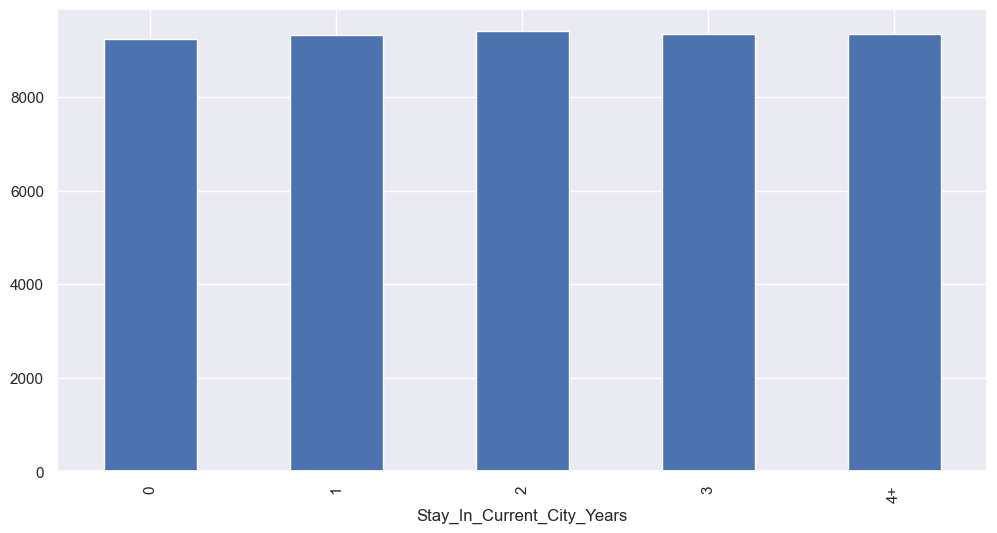

In [31]:
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

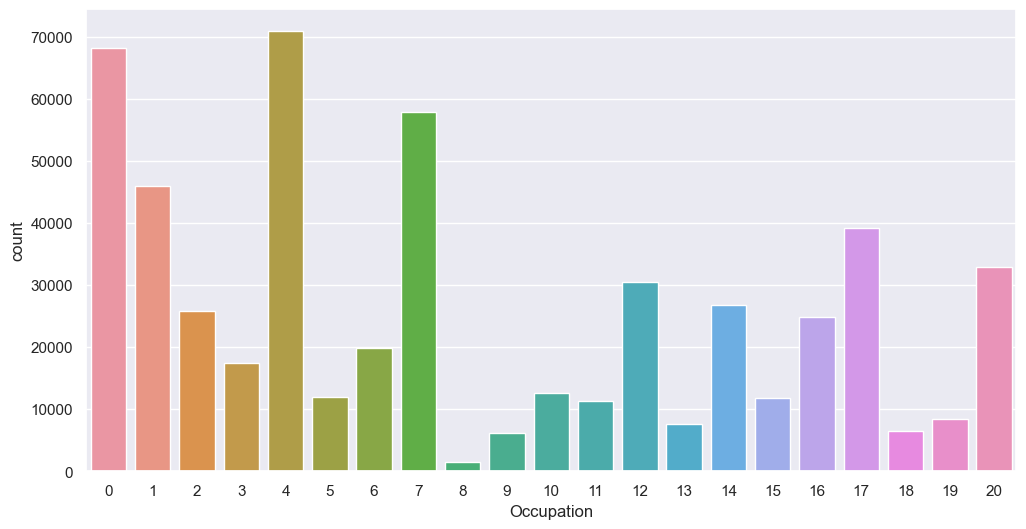

In [32]:
sns.countplot(x = df['Occupation'])

<AxesSubplot:xlabel='Occupation'>

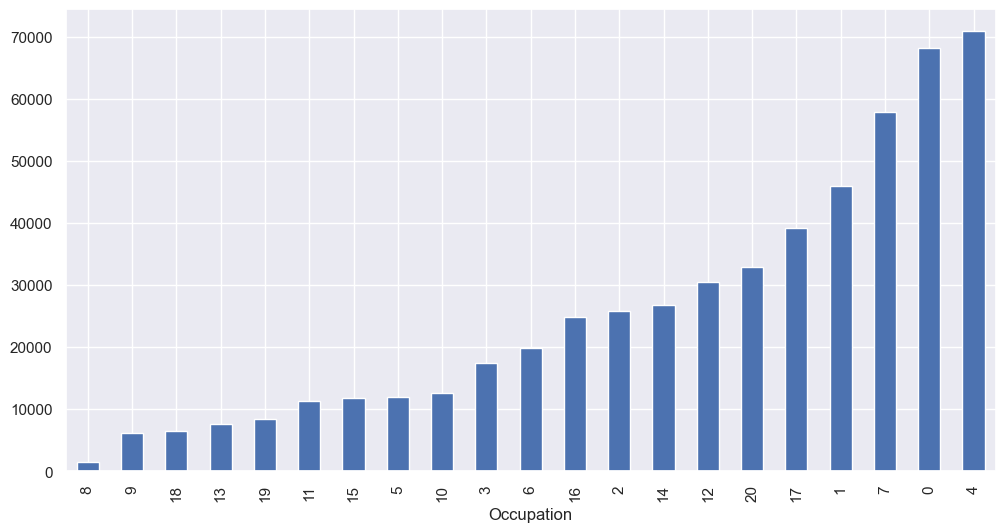

In [33]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

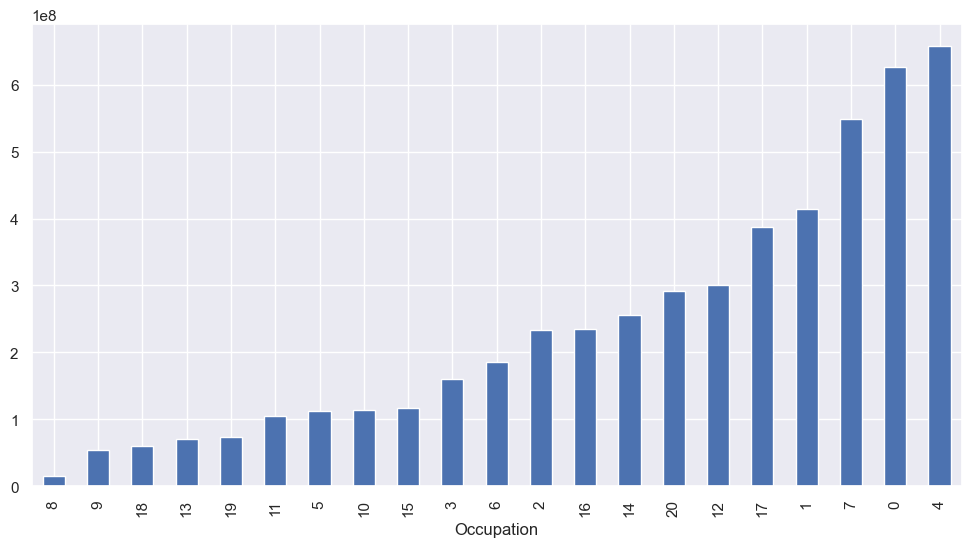

In [34]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

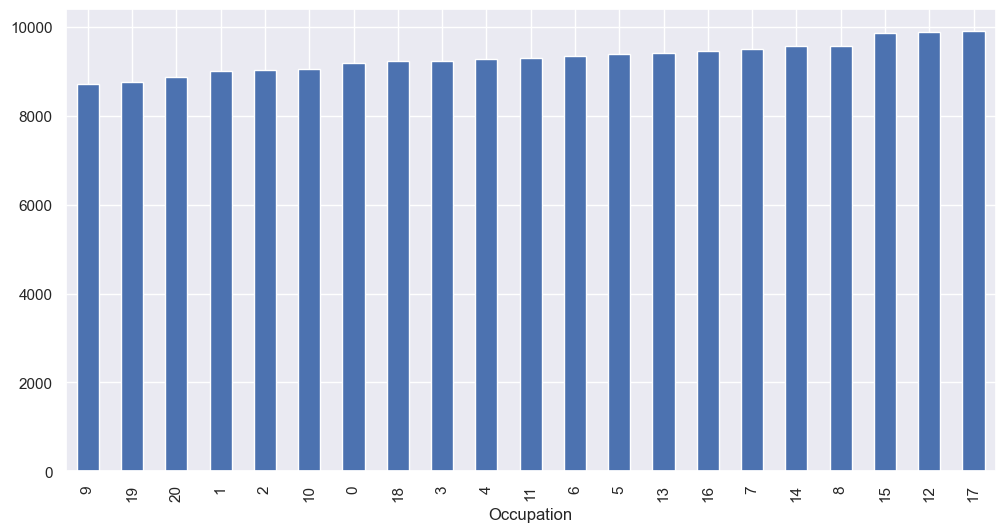

In [35]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

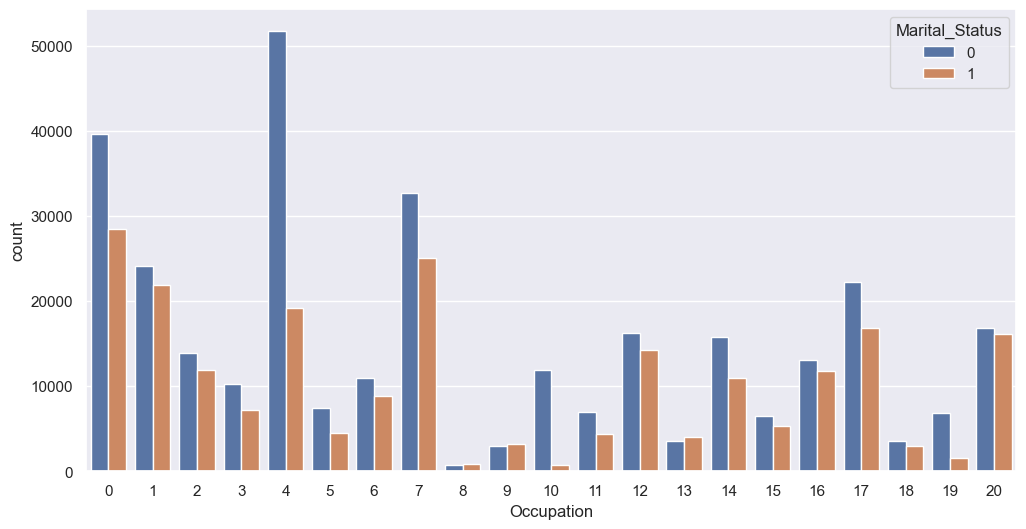

In [36]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

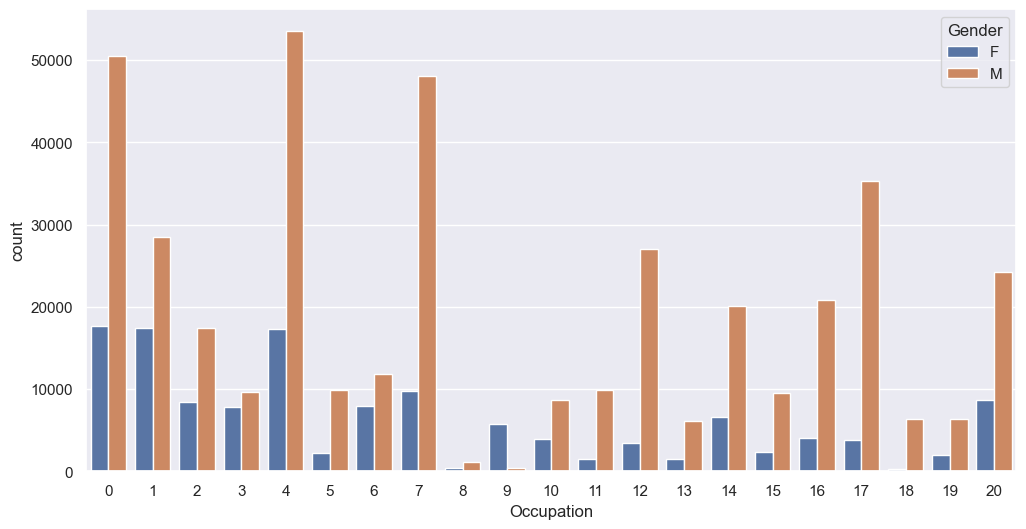

In [38]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Occupation'>

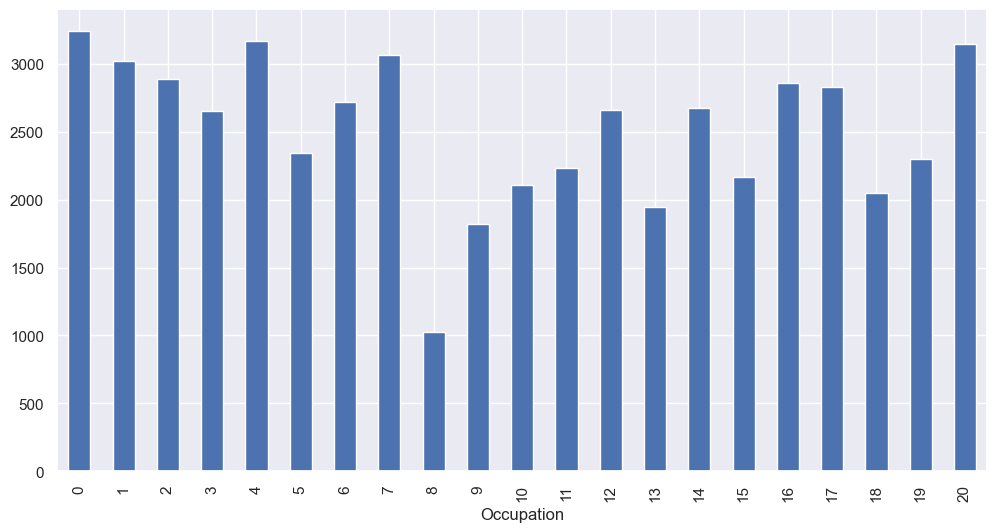

In [39]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

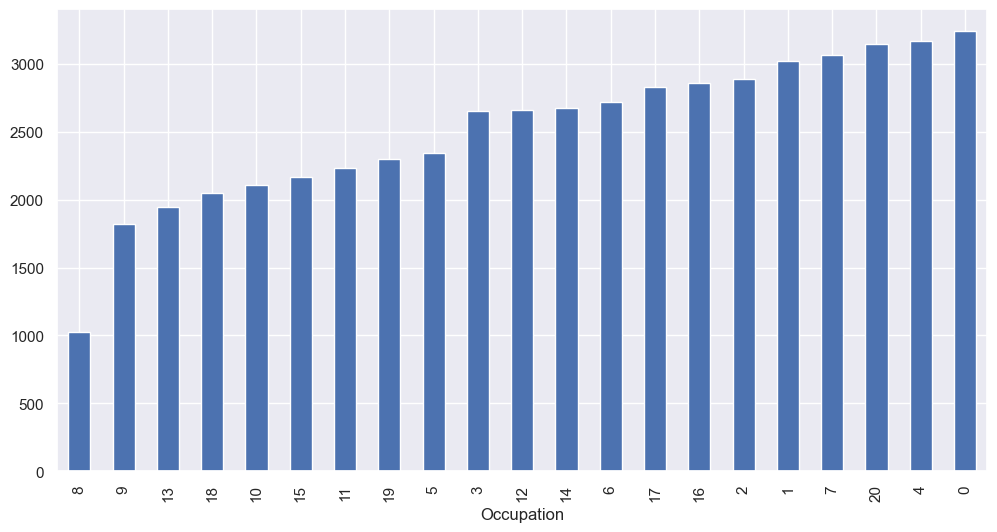

In [40]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

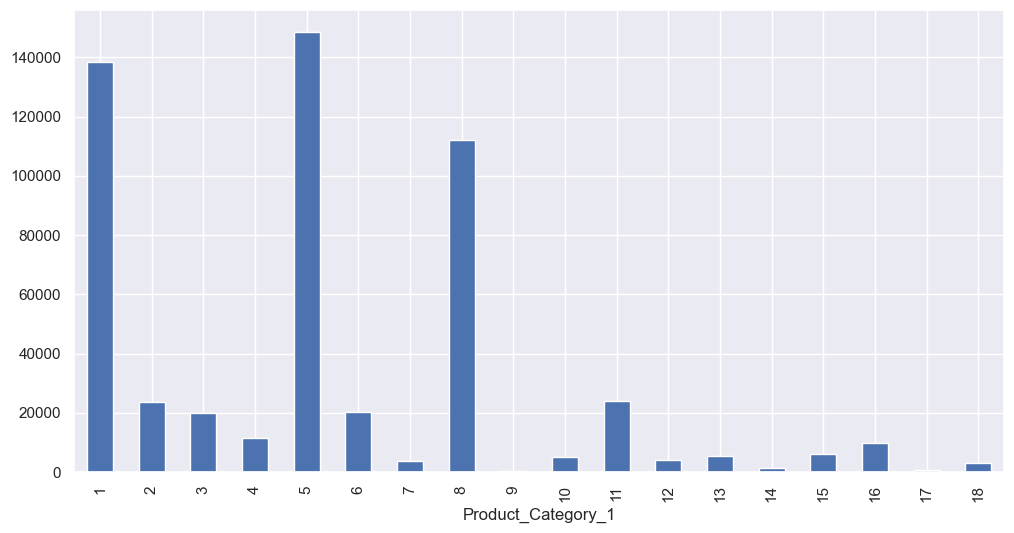

In [41]:
df.groupby('Product_Category_1').size().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

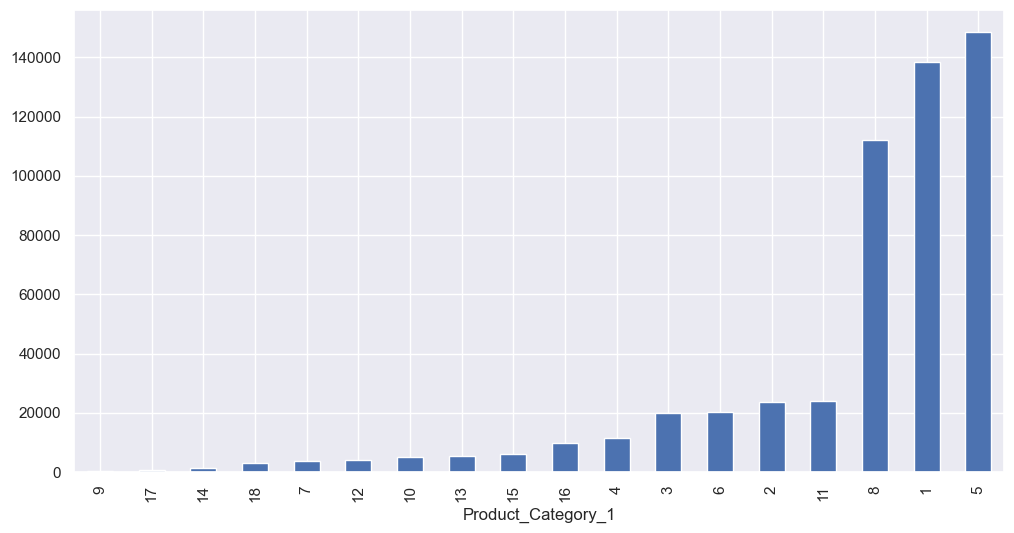

In [42]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

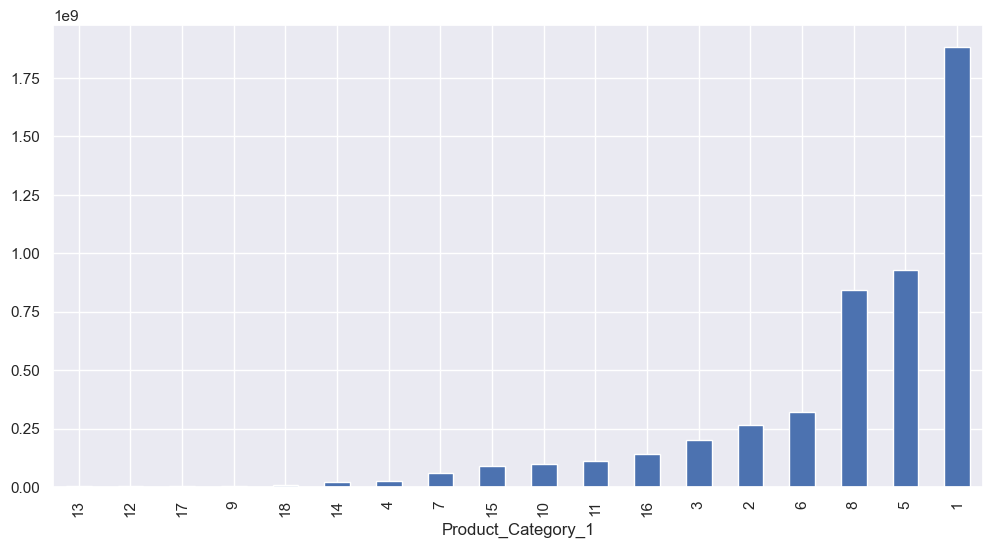

In [43]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

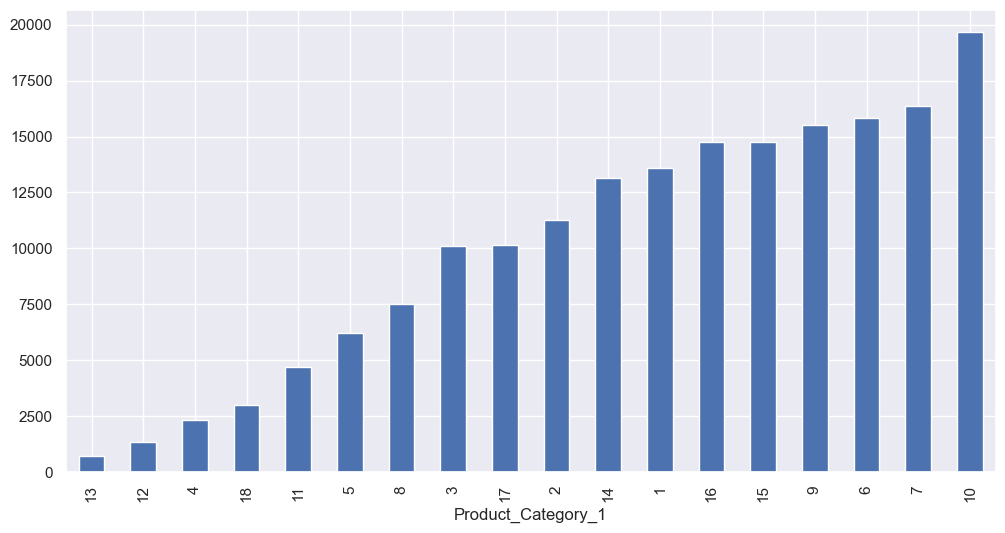

In [44]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_ID'>

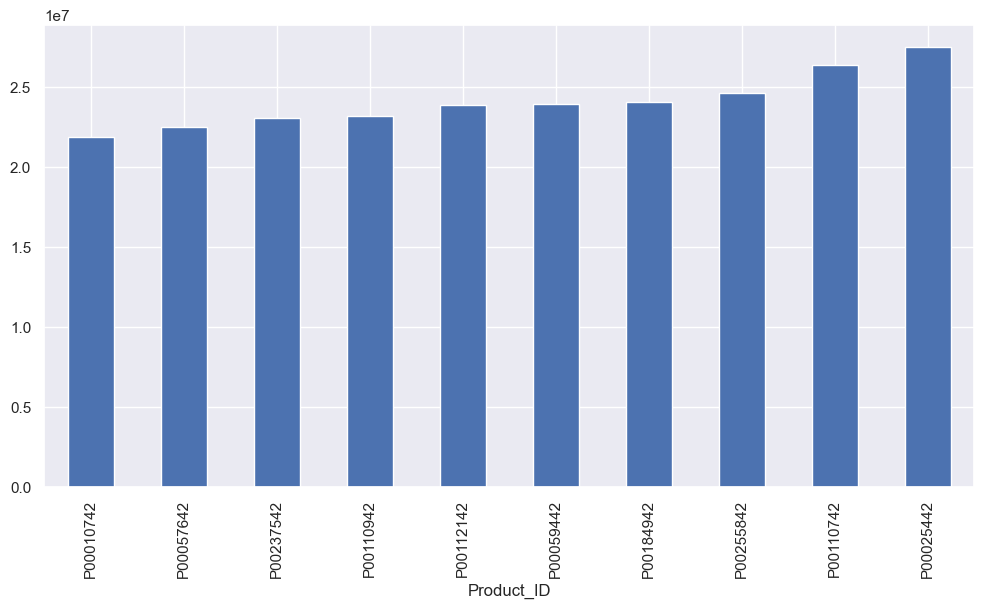

In [45]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_ID'>

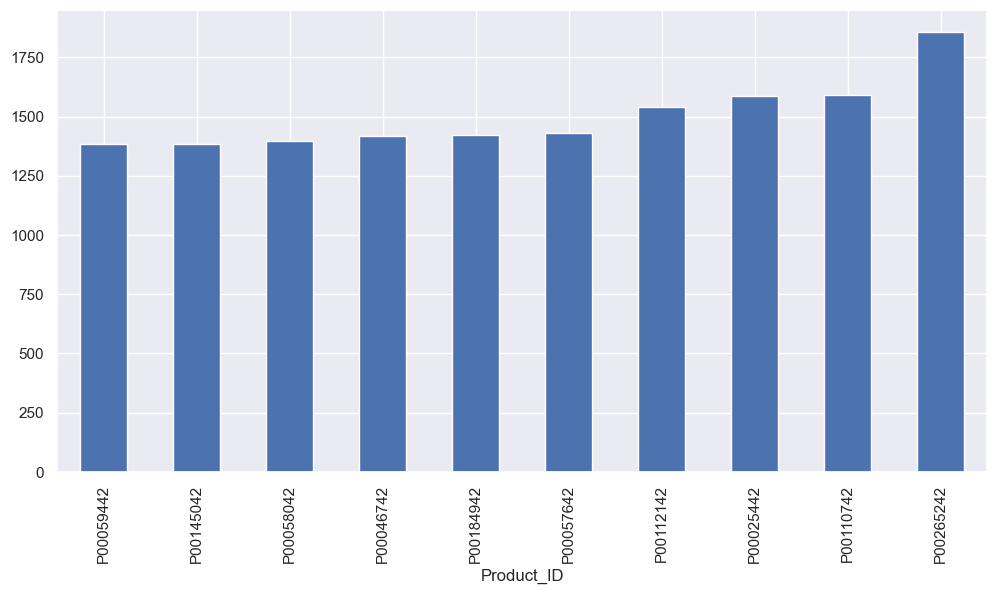

In [46]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_ID'>

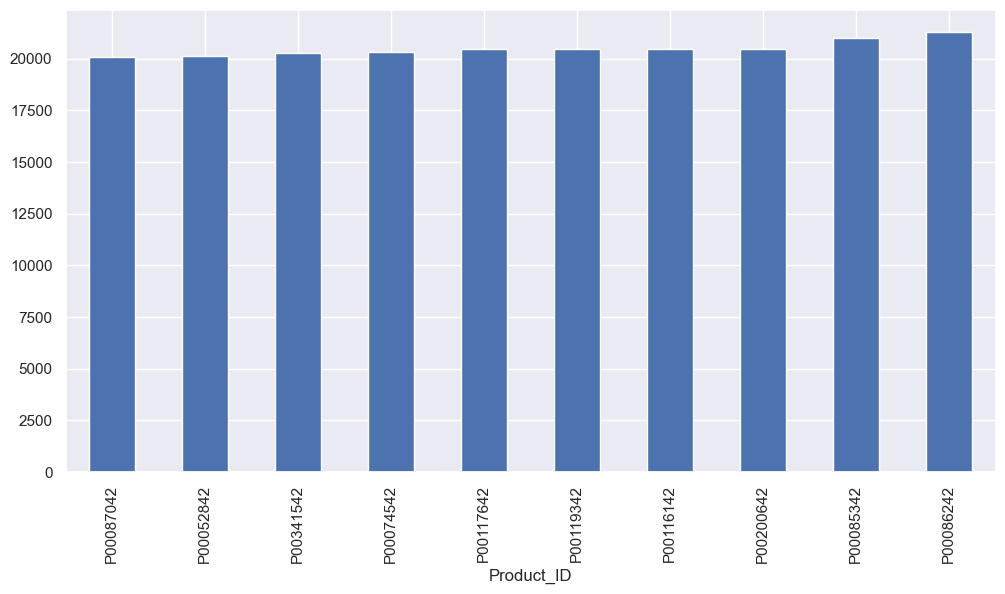

In [47]:
df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

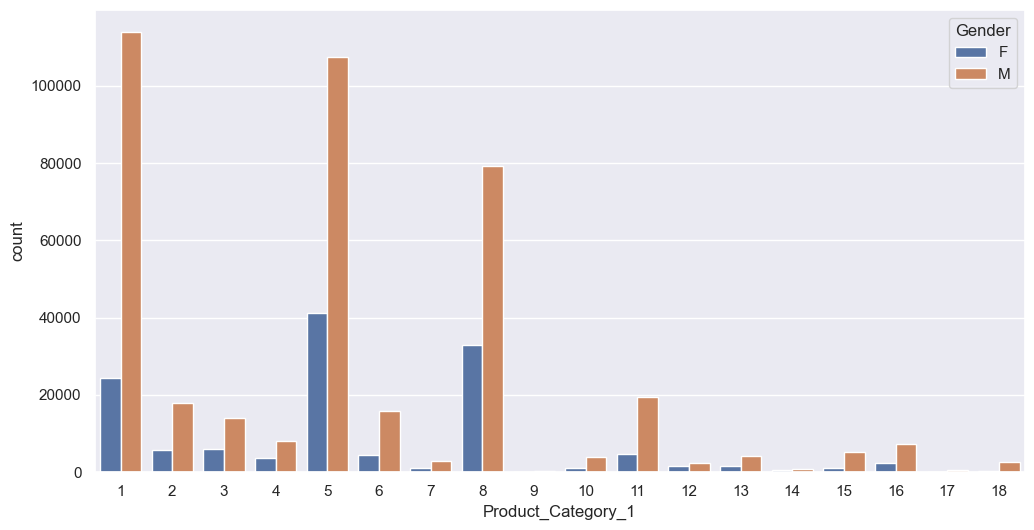

In [48]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

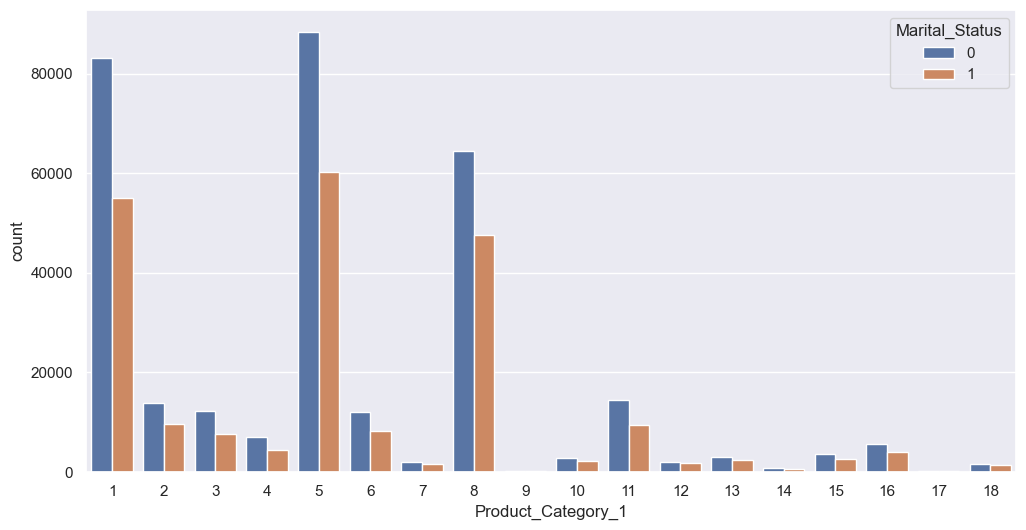

In [49]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

In [50]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

In [51]:

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<AxesSubplot:xlabel='MaritalGender', ylabel='count'>

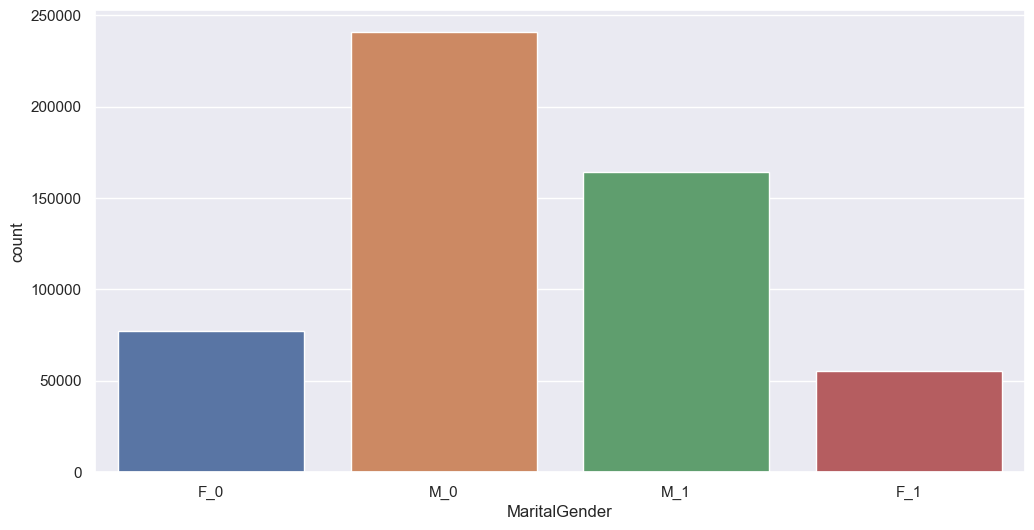

In [52]:
sns.countplot(x = df['MaritalGender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

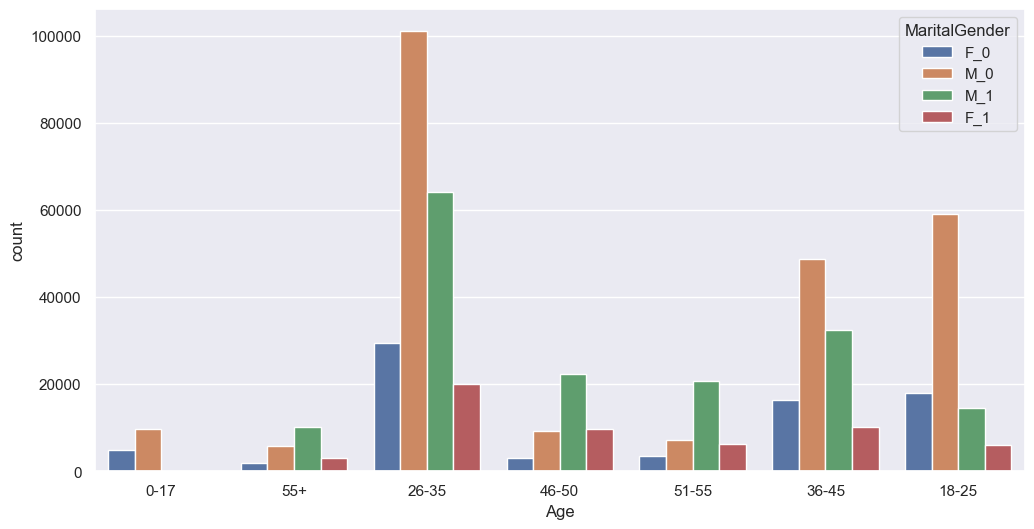

In [53]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

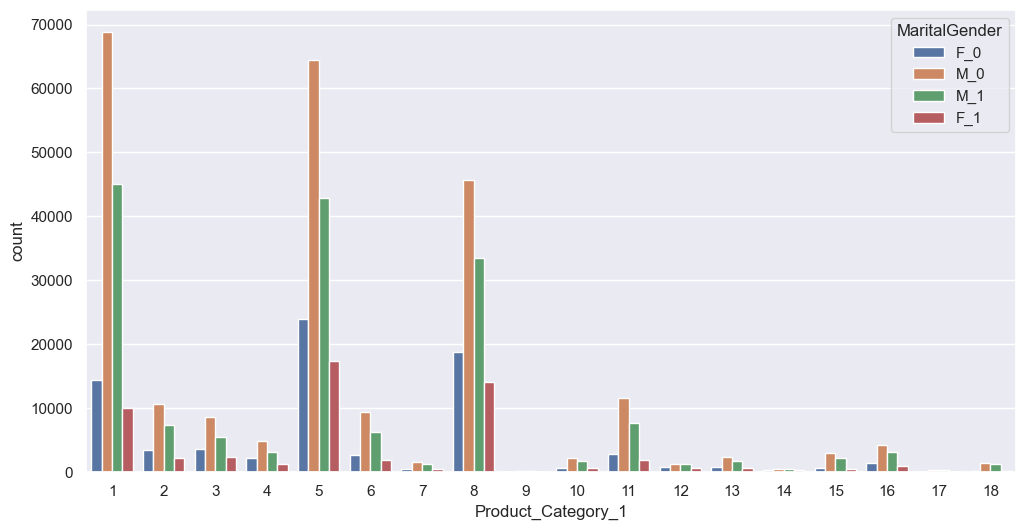

In [54]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

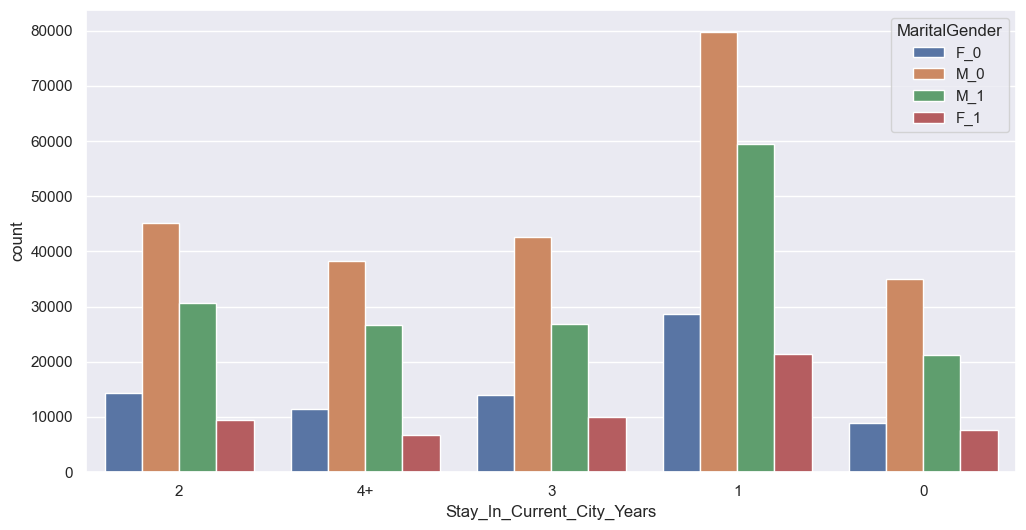

In [55]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

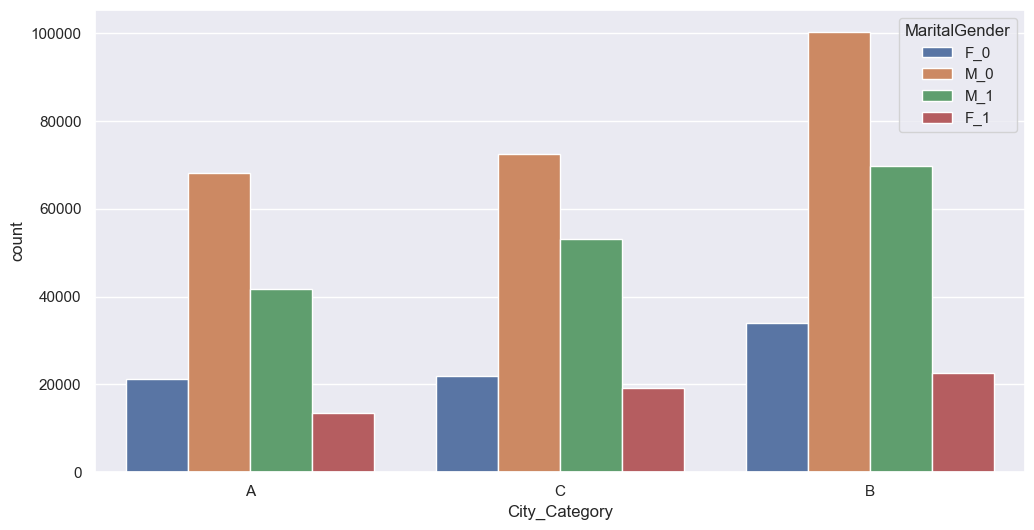

In [56]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])